In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,NaN,-0.93597,NaN,-0.04549,...,NaN,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,NaN,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	0
float64		column 6	0
float64		column 7	9
float64		column 8	0
float64		column 9	12
float64		column 10	3
float64		column 11	12
float64		column 12	0
float64		column 13	9
float64		column 14	0
float64		column 15	3
float64		column 16	0
float64		column 17	9
float64		column 18	0
float64		column 19	6
float64		column 20	0
float64		column 21	12
float64		column 22	0
float64		column 23	3
float64		column 24	0
float64		column 25	6
float64		column 26	0
float64		column 27	0
float64		column 28	0
float64		column 29	6
float64		column 30	0
float64		column 31	0
float64		column 32	0
float64		column 33	6
float64		column 34	0


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,342.000000,351.000000,339.000000,348.000000,...,345.000000,351.000000,351.000000,351.000000,345.000000,351.000000,351.000000,351.000000,345.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.545421,0.119360,0.507272,0.182342,...,0.396359,-0.071187,0.541641,-0.069538,0.374900,-0.027907,0.352514,-0.003794,0.348074,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.494733,0.520750,0.510355,0.484795,...,0.580655,0.508495,0.516205,0.550025,0.576854,0.507974,0.571483,0.513574,0.524971,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.199265,-0.054840,0.083125,-0.047147,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.726545,0.014710,0.680650,0.017550,...,0.556770,-0.015050,0.708240,-0.017690,0.495380,0.000000,0.442770,0.000000,0.408210,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.965225,0.445675,0.949760,0.541510,...,0.909090,0.156765,0.999945,0.153535,0.885680,0.154075,0.857620,0.200120,0.819790,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

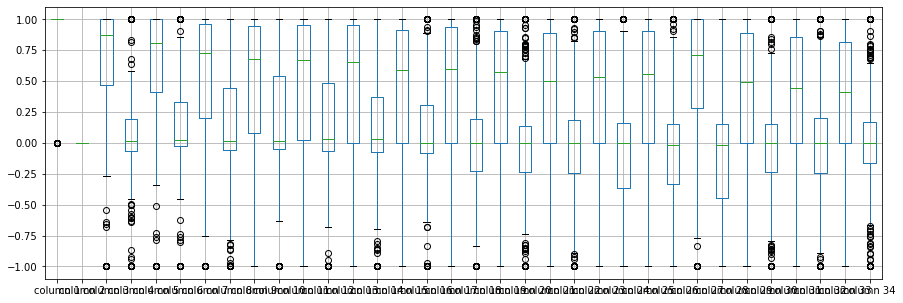

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.601068
column 6     0.115889
column 7     0.545421
column 8     0.119360
column 9     0.507272
column 10    0.182342
column 11    0.475817
column 12    0.155040
column 13    0.407330
column 14    0.093414
column 15    0.338505
column 16    0.071132
column 17    0.390415
column 18   -0.003617
column 19    0.363569
column 20   -0.024025
column 21    0.339779
column 22    0.008296
column 23    0.357106
column 24   -0.057406
column 25    0.396359
column 26   -0.071187
column 27    0.541641
column 28   -0.069538
column 29    0.374900
column 30   -0.027907
column 31    0.352514
column 32   -0.003794
column 33    0.348074
column 34    0.014480
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.220844,0.027079,0.188553,-0.051312,...,0.016953,0.149789,-0.203100,-0.010725,0.132543,-0.121415,0.167031,-0.100914,0.162962,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.441342,0.008717,0.473770,0.049640,...,0.308207,-0.073202,0.077911,0.123345,0.344057,0.057890,0.246653,-0.009332,0.263933,0.000584
column 4,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.053085,0.255003,-0.294928,0.204031,...,-0.104897,-0.236987,-0.046910,0.000743,-0.037966,0.342301,-0.172276,-0.122788,-0.161951,0.034608
column 5,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.597754,-0.029794,0.447757,-0.032648,...,0.243876,-0.032254,0.140899,0.184517,0.254311,0.051068,0.399840,0.025681,0.385537,-0.099478
column 6,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,-0.013033,0.274747,-0.109479,0.195567,...,-0.178329,0.041787,-0.175433,-0.068775,-0.030203,-0.158090,-0.100240,0.316802,0.007245,0.185215
column 7,0.220844,NaN,0.441342,-0.053085,0.597754,-0.013033,1.000000,-0.154268,0.461553,-0.086237,...,0.281033,0.093174,0.087264,0.108550,0.295954,-0.015352,0.410677,-0.010126,0.547942,-0.074837
column 8,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.154268,1.000000,-0.327405,0.370575,...,-0.184285,-0.133023,-0.254130,0.072373,-0.139950,0.078585,-0.166682,0.152381,-0.218319,0.360610
column 9,0.188553,NaN,0.473770,-0.294928,0.447757,-0.109479,0.461553,-0.327405,1.000000,-0.237494,...,0.356458,0.106191,0.168993,0.140816,0.329543,-0.040907,0.318621,-0.076443,0.352812,-0.097723
column 10,-0.051312,NaN,0.049640,0.204031,-0.032648,0.195567,-0.086237,0.370575,-0.237494,1.000000,...,-0.252029,-0.051772,-0.249597,0.066056,-0.110880,-0.017355,-0.150451,-0.023971,-0.212299,0.092115


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [34,34+10,34+10+10,34+10+10+10,34+10+10+10+10,34+10+10+10,34+10+10,34+10,34], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.24851794469924
Epoch: 1 , loss: 20.042586735316686
Epoch: 2 , loss: 20.06200363522484
Epoch: 3 , loss: 20.129236675444105
Epoch: 4 , loss: 20.10238202412923
Epoch: 5 , loss: 19.938439777919225
Epoch: 6 , loss: 19.73319516863142
Epoch: 7 , loss: 19.866258394150506
Epoch: 8 , loss: 19.84404182434082
Epoch: 9 , loss: 19.93643333798363
Epoch: 10 , loss: 19.770985648745583
Epoch: 11 , loss: 19.52800741649809
Epoch: 12 , loss: 19.48162069774809
Epoch: 13 , loss: 19.44930730547224
Epoch: 14 , loss: 19.413059325445268
Epoch: 15 , loss: 19.20524097624279
Epoch: 16 , loss: 18.996443884713308
Epoch: 17 , loss: 18.624311492556618
Epoch: 18 , loss: 18.092473802112398
Epoch: 19 , loss: 17.75410538627988
Epoch: 20 , loss: 17.440246809096564
Epoch: 21 , loss: 17.515128726050968
Epoch: 22 , loss: 17.377500851949055
Epoch: 23 , loss: 17.376534098670597
Epoch: 24 , loss: 17.460059256780717
Epoch: 25 , loss: 17.2414576

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,0,0.0,0.0,0.0,0.0,0.516815,0.0,-0.627994,0.0,...,0.498342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396983,0.0
2,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
347,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
348,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
349,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

5.985440174301612

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [39]:
NRMS=numerator/denominator
NRMS


0.08742952633026778

In [40]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.833980,-0.37708,1.000000,0.03760,...,0.568110,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.186410,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,0.408135,-0.93597,0.372006,-0.04549,...,0.295022,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,0.259603,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.000000,-0.12062,0.889650,0.01198,...,0.575280,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.560450,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.712160,-1.00000,0.000000,0.00000,...,1.000000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.323820,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.921060,-0.23255,0.771520,-0.16399,...,0.032860,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.046080,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.843490,-0.05567,0.904410,-0.04622,...,0.953780,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.905460,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.934380,-0.01920,0.945900,0.01606,...,0.945200,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.914830,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.951770,-0.03431,0.955840,0.02446,...,0.939880,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.926970,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.956910,-0.03646,0.857460,0.00110,...,0.910500,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.874030,-0.16243


In [42]:
imputations[-1].to_excel("Ionosphere_AN_1(imp).xlsx", index=False, header=False)